## About The Data
This is a list of 1,000 hotels and their reviews provided by Datafiniti's Business Database. The dataset includes hotel location, name, rating, review data, title, username, and more.
 Full Schema of the data is available at (https://developer.datafiniti.co/docs/business-data-schema)
 

*   In this notebook we will be dealing with some data cleaning activity, fixing up some features such as dates
*   List item



In [0]:
# let's start of with importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# importing the data
data = pd.read_csv("7282_1.csv",encoding='utf-8')
print('Shape of the data: ', data.shape)

Shape of the data:  (35912, 19)


In [3]:
# checking the head of the data
data.head(5)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [4]:
# checking the info for the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
address                 35912 non-null object
categories              35912 non-null object
city                    35912 non-null object
country                 35912 non-null object
latitude                35826 non-null float64
longitude               35826 non-null float64
name                    35912 non-null object
postalCode              35857 non-null object
province                35912 non-null object
reviews.date            35653 non-null object
reviews.dateAdded       35912 non-null object
reviews.doRecommend     0 non-null float64
reviews.id              0 non-null float64
reviews.rating          35050 non-null float64
reviews.text            35890 non-null object
reviews.title           34290 non-null object
reviews.userCity        16263 non-null object
reviews.username        35869 non-null object
reviews.userProvince    17518 non-null object
dtypes: float64(5), 

In [5]:
# checking the statistical info for numerical columns
data.describe()

,latitude,longitude,reviews.doRecommend,reviews.id,reviews.rating
count,35826.000000,35826.000000,0.0,0.0,35050.000000
mean,37.285008,-85.725758,NaN,NaN,3.776431
std,6.996544,33.062263,NaN,NaN,1.416195
min,-25.436750,-166.559040,NaN,NaN,0.000000
25%,33.827340,-104.868200,NaN,NaN,3.000000
50%,37.936026,-86.822972,NaN,NaN,4.000000
75%,41.672491,-77.044550,NaN,NaN,5.000000
max,63.877674,115.164407,NaN,NaN,10.000000


In [6]:
# let's check out the number of nulls in each column
data.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35912
reviews.id              35912
reviews.rating            862
reviews.text               22
reviews.title            1622
reviews.userCity        19649
reviews.username           43
reviews.userProvince    18394
dtype: int64

We can see that 'reviews.doRecommend' and 'reviews.id' feature have no records for all the observation. So it will be safe to drop these columns.

In [0]:
# dropping the 'reviews.doRecommend' and 'reviews.id' columns
data = data.drop(['reviews.doRecommend','reviews.id'],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


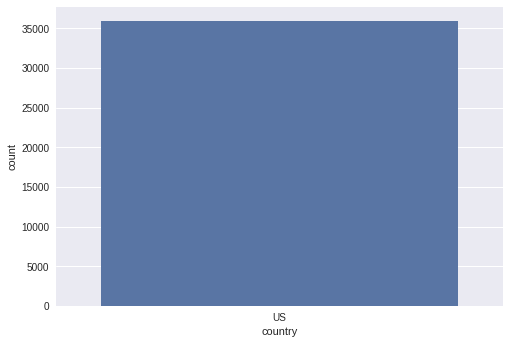

In [8]:
# let's quickly check out the 'country' from which these reviews came in
sns.countplot('country', data = data)

In [9]:
# let's check out the top 10 hotels from which the most reviews came in
data['name'].value_counts()[:10]

The Alexandrian, Autograph Collection          1185
Howard Johnson Inn - Newburgh                   714
Americas Best Value Inn                         567
Fiesta Inn and Suites                           546
Ip Casino Resort Spa                            392
Best Western Plus Waterville Grand Hotel        335
Hampton Inn Virginia Beach Oceanfront North     334
Comfort Suites                                  326
New York Marriott Marquis                       320
Best Western of Long Beach                      317
Name: name, dtype: int64

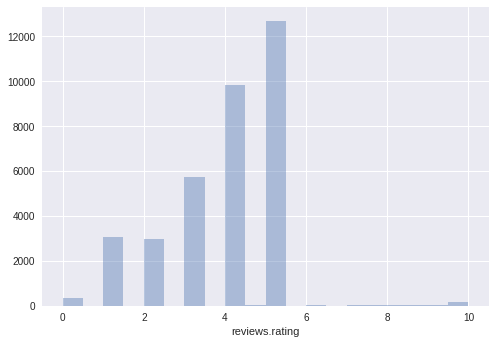

In [10]:
# let's check the distribution of the rating
sns.distplot(data['reviews.rating'].dropna(),kde=False,bins=20)

From the visualization above it is clear that some basic issues that needs to be fixed before starting. Some reviews had a '0' rating and some reviews had a rating above '5', so filtering these records out of the dataset.


In [0]:
# adding new feature called 'length' which is length of reviews
data['length'] = data['reviews.text'].dropna().apply(len)
data['length'] = data['length'].fillna(0)
data['length'] = data['length'].astype(int)

# filling empty reviews with an 'x'
data['reviews.text'] = data['reviews.text'].fillna('x')

# keeping the records which have the ratings greater than 0 and less than equal to 5
data = data[data['reviews.rating']>0]
data = data[data['reviews.rating']<=5]

# rounding each of those down to an integer since some ratings had decimals
data['reviews.rating'] = data['reviews.rating'].astype(int)

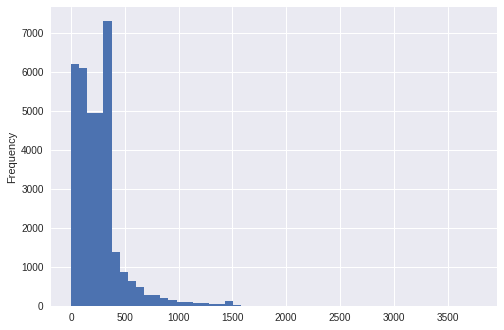

In [12]:
# plotting reviews length
data['length'].plot(bins=50, kind='hist')

In [13]:
# describing the length column
data['length'].describe()

count    34356.000000
mean       255.012574
std        218.010022
min          0.000000
25%        102.000000
50%        225.000000
75%        330.000000
max       3772.000000
Name: length, dtype: float64

Woah! 3772 characters is the length of the max review, let's use masking to find this message:

In [14]:
# printing the longest review
data[data['length'] == 3772]['reviews.text'].iloc[0]

"Denied access, after fully paid confirmed reservation My problems with this company began in December 2011 when I purchased two Groupon vouchers at 329 each for two nights each. The fine print stated there was an additional fee of 125 for cleaning and insurance per voucher, as well as 12.5 tax. After several days of trying to reach a live person I was able to get a registration clerk who informed me that several of the days I needed were blacked out to Groupon users, as well as certain cabins. This was not listed in the fine print and thus I had to receive a refund on one due to the dates I needed being blacked out. A few days later I called to book for the second voucher and was informed that the additional fees totaled more than 250. I explained what my voucher said, and that my fees should total 181.75 per the Groupon. The clerk refused to budge and also refused to allow me to speak with a member of management, stating, the buck stops with me, if you don't want to pay it, get a ref

Correleation between length of reviews and rating is:  -0.1531054233620009


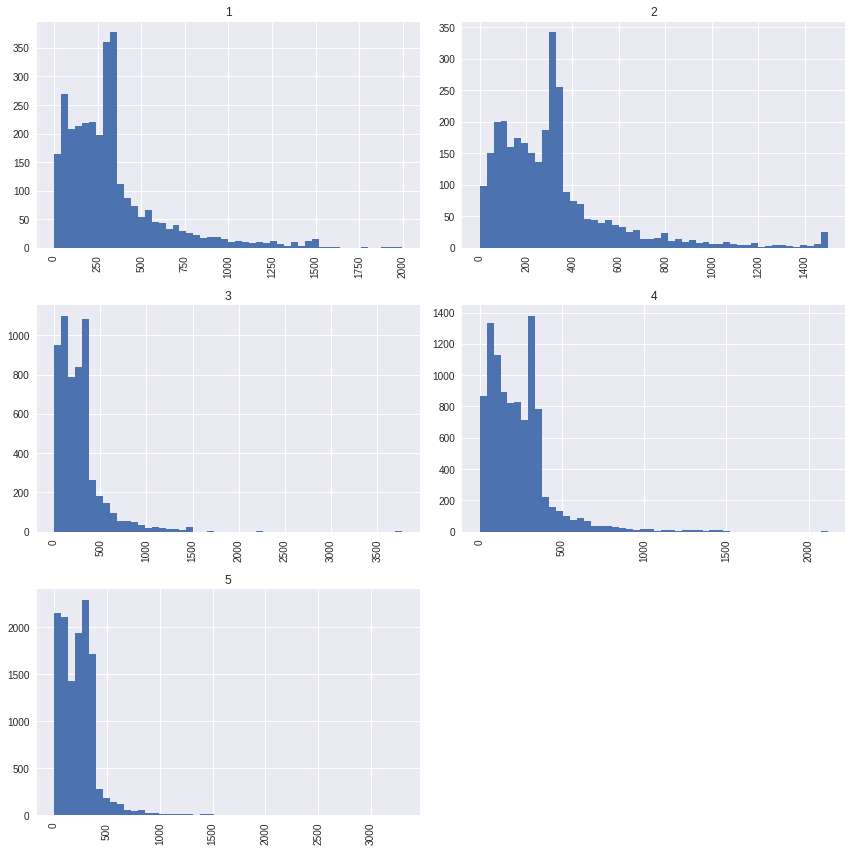

In [15]:
# visualizing the length of reviews agaignst the rating to find some pattern
data.hist(column='length', by='reviews.rating', bins=50,figsize=(12,12))
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.tight_layout()

print('Correleation between length of reviews and rating is: ',data['length'].corr(data['reviews.rating']))

**We can see some aspects **

*   Most of the people who have given higher ratings have kept there reviews short.
*   Some of the people who have given less ratings have tend to given longer reviews 



In [0]:
# let's handle the date and time section
data['Date'] = pd.to_datetime(data['reviews.dateAdded'], errors='coerce')
data['new_date'] = [d.date() for d in data['Date']]
data['new_time'] = [d.time() for d in data['Date']]
data['day'] = pd.DatetimeIndex(data['new_date']).day 
data['month'] = pd.DatetimeIndex(data['new_date']).month
data['year'] = pd.DatetimeIndex(data['new_date']).year 
data = data.drop(['Date'],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


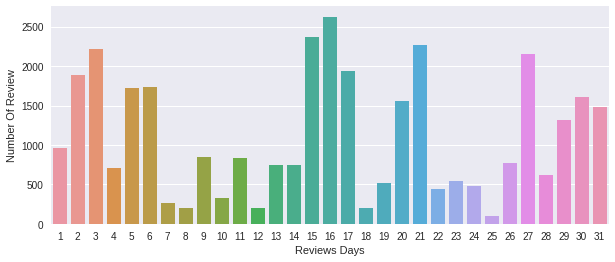

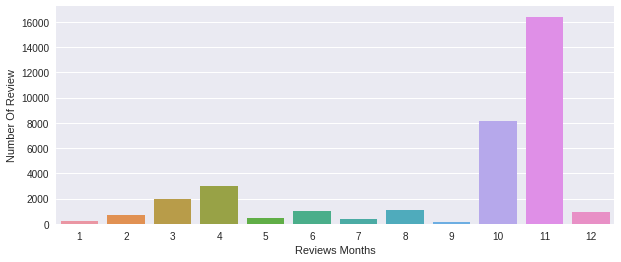

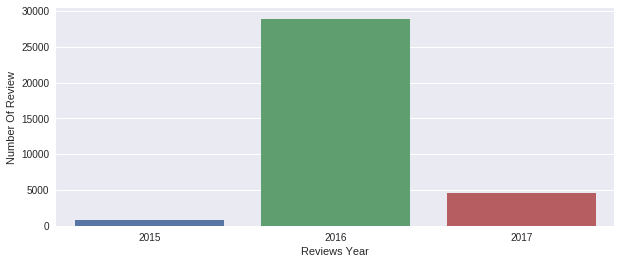

In [17]:
# let's visualize if we can see any patterns in day, month or years for the review 
plt.figure(figsize=(10,4))
sns.countplot(data['day'])
plt.ylabel("Number Of Review")
plt.xlabel("Reviews Days")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data['month'])
plt.ylabel("Number Of Review")
plt.xlabel("Reviews Months")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data['year'])
plt.ylabel("Number Of Review")
plt.xlabel("Reviews Year")
plt.show()

**Some pattern which can be listed from the dates are**


*   When it comes to day, most of the reviews were made during start, mid and end of the month. 
*   When it comes to month, most of the reviews were made during year end during holidays when people actually travel more. i,e,. October, November and December.


*   For years, the review came mostly from 2016.





/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


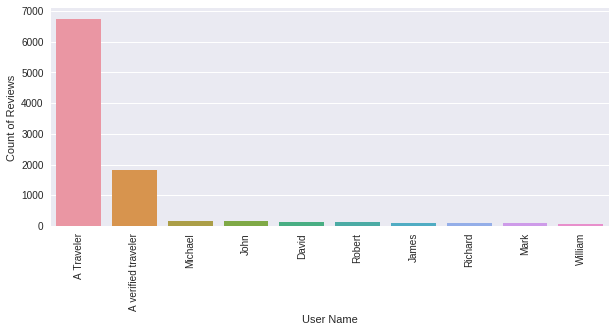

In [18]:
# let's visualize to see which are the top 10 users who has given most reviews

user_freq = data['reviews.username'].value_counts()[:10]
plt.figure(figsize=(10,4))
sns.barplot(user_freq.index,user_freq.values)
plt.ylabel('Count of Reviews')
plt.xlabel('User Name')
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


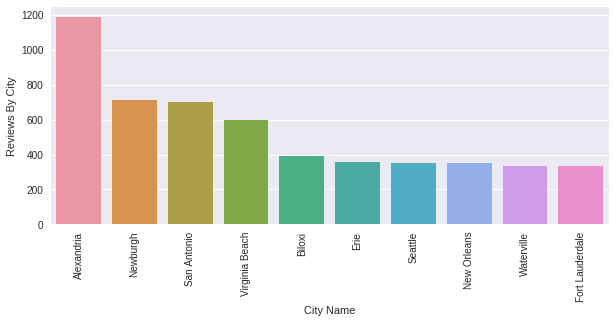

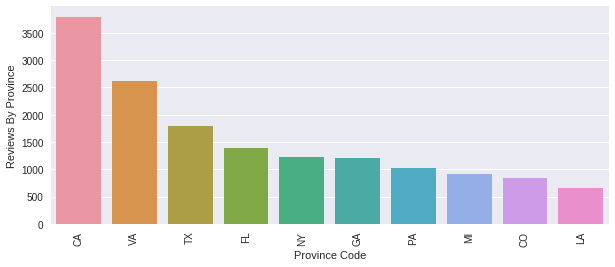

In [19]:
# let's visualize to see which are the top 10 cities and provinces from which the reviews came in
city_counts = data['city'].value_counts()[:10]
plt.figure(figsize=(10,4))
sns.barplot(city_counts.index,city_counts.values)
plt.ylabel('Reviews By City')
plt.xlabel('City Name')
plt.xticks(rotation='vertical')
plt.show()

province_counts = data['province'].value_counts()[:10]
plt.figure(figsize=(10,4))
sns.barplot(province_counts.index,province_counts.values)
plt.ylabel('Reviews By Province')
plt.xlabel('Province Code')
plt.xticks(rotation='vertical')
plt.show()


**Some pattern which can be listed from the City and Provinces are**


*   City Alexandria saw most of the reviews coming in with fair amount of reviews coming from Newburgh, San Antonio and Virginia beach 
*   California saw most of the reviews coming in when coming to province





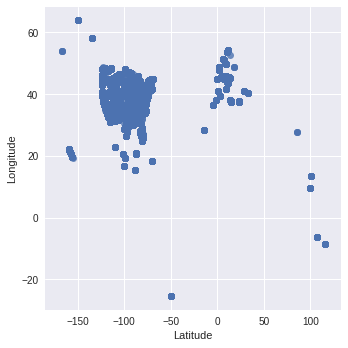

In [20]:
# plotting location of hotel reviews
plt.figure(figsize=(10,5))
sns.lmplot(x='longitude',y='latitude',data=data,fit_reg=False)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

In [0]:
# filtering the reviews to only include datapoints within the US
data = data[((data['latitude']<=50.0) & (data['latitude']>=24.0)) & ((data['longitude']<=-65.0) & (data['longitude']>=-122.0))]

## Now let's begin to process the data so we can eventually use it

In [0]:
# importing the libraries
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [26]:
import nltk # imports the library
#nltk.download() # downloads the necessary datasets

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

Lets's create a function to process the reviews

In [0]:
def text_process(revs):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # lower case the input string
    revs = revs.lower()
    
    # check characters to see if they are in punctuation
    nopunc = [char for char in revs if char not in string.punctuation]

    # join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in nopunc.split() if not word in set(stopwords.words('english'))]
    
    
    return review

In [28]:
# checking to make sure its working
data['reviews.text'].head(5).apply(text_process)

60    [wonder, relax, time, staff, complet, attent, ...
61    [palm, spring, day, temperatur, 123, degre, de...
62    [arriv, palm, spring, sure, expectit, quiet, k...
63    [place, realli, littl, paradis, beauti, boutiq...
64    [spent, 3, night, littl, paradis, boutiqu, hot...
Name: reviews.text, dtype: object

Given the function working, so now lets create the Bag of Words (BoW) model which a machine learning model can understand. 

*   We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.
*   Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.

In [0]:
# import the library
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# fitting reviews to our BoW model
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['reviews.text'])

# print total number of vocab words
print(len(bow_transformer.vocabulary_))

22482


In [0]:
# using transform on the bow model
reviews_bow = bow_transformer.transform(data['reviews.text'])

In [32]:
print('Shape of Sparse Matrix: ', reviews_bow.shape)
print('Amount of Non-Zero occurences: ', reviews_bow.nnz)

Shape of Sparse Matrix:  (29463, 22482)
Amount of Non-Zero occurences:  639435


In [33]:
# checking the sparsity of the matrix
sparsity = (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1]))
print('Sparsity: {}'.format(round(sparsity)))

Sparsity: 0


In [0]:
# import library for tf-idf transformer
from sklearn.feature_extraction.text import TfidfTransformer

# transforming the BoW model
tfidf_transformer = TfidfTransformer().fit(reviews_bow)

In [35]:
reviews_tfidf = tfidf_transformer.transform(reviews_bow)
print('Shape: ',reviews_tfidf.shape)

Shape:  (29463, 22482)


Given, the data is prepared for training the machine learning model. Let use a classifier model such as Naive Bayes model which is expected to work well during these scenarios. But before that,
Lets add a new feature for sentiment analysis called 'Label'.


*   Ratings <= 2 will be considered **Bad** i,e,. **0**
*   Ratings >2 will be considered **Good** i,e,. **1**



In [0]:
data['label'] = data['reviews.rating'].apply(lambda x: 0 if x<=2 else 1 )

In [37]:
# performing train test split
from sklearn.model_selection import train_test_split

rev_train, rev_test, ratings_train, ratings_test = \
train_test_split(data['reviews.text'], data['label'], test_size=0.2, random_state = 0)

print('Shape of training set is: {}'.format(rev_train.shape))
print('Shape of test set is: {}'.format(rev_test.shape))

Shape of training set is: (23570,)
Shape of test set is: (5893,)


Creating a pipeline to execute a set of events.

In [0]:
#importing the library for pipeline and classifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [39]:
# fitting the dataset to the pipeline
pipeline.fit(rev_train,ratings_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f7fe6a13d08>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [0]:
# storing the predicted results in the predictions
predictions = pipeline.predict(rev_test)

In [0]:
# importing the libraries to analyse the results
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

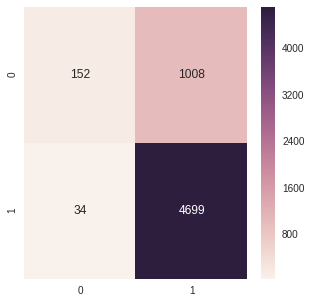

In [42]:
# plotting the confusion matrix to analyse the results better
cm = confusion_matrix(ratings_test, predictions)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, fmt='g')

In [43]:
# printing the classification report
print(classification_report(ratings_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.13      0.23      1160
          1       0.82      0.99      0.90      4733

avg / total       0.82      0.82      0.77      5893



In [44]:
print("Accuracy of the model is found to be: ",accuracy_score(ratings_test, predictions))
print("F1 score of the model is found to be: ",f1_score(ratings_test, predictions))

Accuracy of the model is found to be:  0.8231800441201426
F1 score of the model is found to be:  0.900191570881226


Accuarcy of the model in classifying the hotel to Good based upon the user reviews seems to be preety good. 
Although model is not able to determine the labels which are 'Bad'. It can be seen from there recall and f1 score. This is due to the fact that there are uneven amount of labels in the training set. It can seen from below.

In [45]:
data['label'].value_counts()

1    23881
0     5582
Name: label, dtype: int64

So, to train our model better, we will be using an over sampling technique called SMOTE (Synthetic Minority Over-sampling Technique). This will balance the data in the dataset.

In [47]:
# importing the library
#!pip install imbalanced-learn   #--for installing the library
from imblearn.over_sampling import SMOTE

sm = SMOTE()

    100% |████████████████████████████████| 174kB 13.3MB/s 
    100% |████████████████████████████████| 5.4MB 7.1MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


In [48]:
# performing train test split
from sklearn.model_selection import train_test_split

rev_train_res, rev_test_res, ratings_train_res, ratings_test_res = \
train_test_split(reviews_tfidf, data['label'], test_size=0.2, random_state = 0)

print('Shape of training set is: {}'.format(rev_train_res.shape))
print('Shape of test set is: {}'.format(rev_test_res.shape))

Shape of training set is: (23570, 22482)
Shape of test set is: (5893, 22482)


In [0]:
# fitting the datset to the object of SMOTE class.
rev_train_res, ratings_train_res = sm.fit_sample(rev_train_res, ratings_train_res)

In [50]:
# checking whether class is still imbalanced or not?
unique, counts = np.unique(ratings_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 19148), (1, 19148)]


In [51]:
# fitting the model to the over sampled data
classifier = MultinomialNB()

classifier.fit(rev_train_res, ratings_train_res)

print('Score of the Model is: ',classifier.score(rev_train_res, ratings_train_res))

Score of the Model is:  0.8825464800501358


In [0]:
# storing the prediction of the model on the resampled data
predictions_res = classifier.predict(rev_test_res)

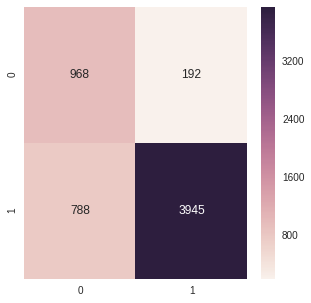

In [53]:
# plotting the confusion matrix to analyse the results better
cm = confusion_matrix(ratings_test_res, predictions_res)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, fmt='g')

In [54]:
# printing the classification report
print(classification_report(ratings_test_res, predictions_res))

             precision    recall  f1-score   support

          0       0.55      0.83      0.66      1160
          1       0.95      0.83      0.89      4733

avg / total       0.87      0.83      0.85      5893



In [55]:
print("Accuracy of the model is found to be: ",accuracy_score(ratings_test_res, predictions_res))
print("F1 score of the model is found to be: ",f1_score(ratings_test_res, predictions_res))

Accuracy of the model is found to be:  0.83370100118785
F1 score of the model is found to be:  0.8895152198421645


Accuarcy of the model in classifying the hotel to Good and Bad based upon the user reviews seems to be preety good now than before.
The results have significantly improved. Now we can see that both the recall and f1 score of the model in determining the bad reviews seem to be pretty good.



Lets check the models performance on the reviews manually given.

In [56]:
# prediction based on the review manually input'd
review = 'dirty rooms and beds are not align'
print('Prediction: ',classifier.predict(tfidf_transformer.transform(bow_transformer.transform([review]))))
review = 'rooms are very beautiful and nice'
print('Prediction: ',classifier.predict(tfidf_transformer.transform(bow_transformer.transform([review]))))

Prediction:  [0]
Prediction:  [1]


###Thus, the final accuracy of the model is determined to be found = 83.37%